# Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#pd.options.display.float_format = '{:.0f}'.format

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/data.csv')

In [4]:
df.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,...,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,4,10,14,7,2018-10-14,AA,19805,AA,N925UY,1674,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1123,1127.0,4.0,4.0,0.0,0.0,1100-1159,26.0,1153.0,1845.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,4,10,15,1,2018-10-15,AA,19805,AA,N583UW,1674,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1123,1119.0,-4.0,0.0,0.0,-1.0,1100-1159,23.0,1142.0,1837.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,4,10,16,2,2018-10-16,AA,19805,AA,N581UW,1674,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1123,1119.0,-4.0,0.0,0.0,-1.0,1100-1159,20.0,1139.0,1847.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,4,10,17,3,2018-10-17,AA,19805,AA,N551UW,1674,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1123,1120.0,-3.0,0.0,0.0,-1.0,1100-1159,20.0,1140.0,1856.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,4,10,18,4,2018-10-18,AA,19805,AA,N181UW,1674,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1123,1125.0,2.0,2.0,0.0,0.0,1100-1159,21.0,1146.0,1855.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,4,10,19,5,2018-10-19,AA,19805,AA,N563UW,1674,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1123,1122.0,-1.0,0.0,0.0,-1.0,1100-1159,17.0,1139.0,1843.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,4,10,21,7,2018-10-21,AA,19805,AA,N507AY,1674,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1123,1124.0,1.0,1.0,0.0,0.0,1100-1159,34.0,1158.0,1908.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,4,10,22,1,2018-10-22,AA,19805,AA,N554UW,1674,12892,1289208,32575

In [5]:
df.tail(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,...,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
7989932,2019,4,10,26,6,2019-10-26,AA,19805,AA,N806AW,2301,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,850,915.0,25.0,25.0,1.0,1.0,0800-0859,25.0,940.0,1013.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7989933,2019,4,10,27,7,2019-10-27,AA,19805,AA,N762US,2301,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,850,845.0,-5.0,0.0,0.0,-1.0,0800-0859,19.0,904.0,941.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7989934,2019,4,10,28,1,2019-10-28,AA,19805,AA,N801AW,2301,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,850,912.0,22.0,22.0,1.0,1.0,0800-0859,21.0,933.0,1006.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7989935,2019,4,10,29,2,2019-10-29,AA,19805,AA,N778XF,2301,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,850,926.0,36.0,36.0,1.0,2.0,0800-0859,26.0,952.0,1021.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7989936,2019,4,10,30,3,2019-10-30,AA,19805,AA,N756US,2301,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,850,941.0,51.0,51.0,1.0,3.0,0800-0859,25.0,1006.0,1035.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7989937,2019,4,10,31,4,2019-10-31,AA,19805,AA,N774XF,2301,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,850,916.0,26.0,26.0,1.0,1.0,0800-0859,27.0,943.0,1019.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7989938,2019,4,10,1,2,2019-10-01,AA,19805,AA,N767UW,2301,13851,1385103,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1028,1019.0,-9.0,0.0,0.0,-1.0,1000-1059,12.0,1031.0,1104.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7989939,2019,4,10,2,3,2019-10-02,AA,19805,AA,

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7989942 entries, 0 to 7989941
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(69), int64(21), object(20)
memory usage: 6.5+ GB


In [7]:
df.shape

(7989942, 110)

In [8]:
print(df.isnull().sum())

Year                      0
Quarter                   0
Month                     0
DayofMonth                0
DayOfWeek                 0
                     ...   
Div5TotalGTime      7989942
Div5LongestGTime    7989942
Div5WheelsOff       7989942
Div5TailNum         7989942
Unnamed: 109        7989942
Length: 110, dtype: int64


Too many null values so lets drop those coloumns whos null values are above 85% considering they dont add much value for your analysis.


In [9]:
df.columns[df.isnull().mean() < 0.99]

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'CarrierD

In [10]:
df=df[df.columns[df.isnull().mean() < 0.99]]

In [11]:
df.shape

(7989942, 62)

In [12]:
df.loc[:,'Year':'DayOfWeek'].nunique()

Year           2
Quarter        4
Month         12
DayofMonth    31
DayOfWeek      7
dtype: int64

The data set comprises of fight data ranging from two years (october 2018 - october 2019) 

In [13]:
obj_col = df.select_dtypes(include=np.object)
obj_col.columns

Index(['FlightDate', 'Reporting_Airline', 'IATA_CODE_Reporting_Airline',
       'Tail_Number', 'Origin', 'OriginCityName', 'OriginState',
       'OriginStateName', 'Dest', 'DestCityName', 'DestState', 'DestStateName',
       'DepTimeBlk', 'ArrTimeBlk', 'CancellationCode'],
      dtype='object')

In [14]:
float_col = df.select_dtypes(include=np.float)
float_col.columns

Index(['DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15',
       'ArrivalDelayGroups', 'Cancelled', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [15]:
int_col = df.select_dtypes(include=np.int)
int_col.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'DOT_ID_Reporting_Airline', 'Flight_Number_Reporting_Airline',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID',
       'OriginStateFips', 'OriginWac', 'DestAirportID', 'DestAirportSeqID',
       'DestCityMarketID', 'DestStateFips', 'DestWac', 'CRSDepTime',
       'CRSArrTime', 'DistanceGroup', 'DivAirportLandings'],
      dtype='object')

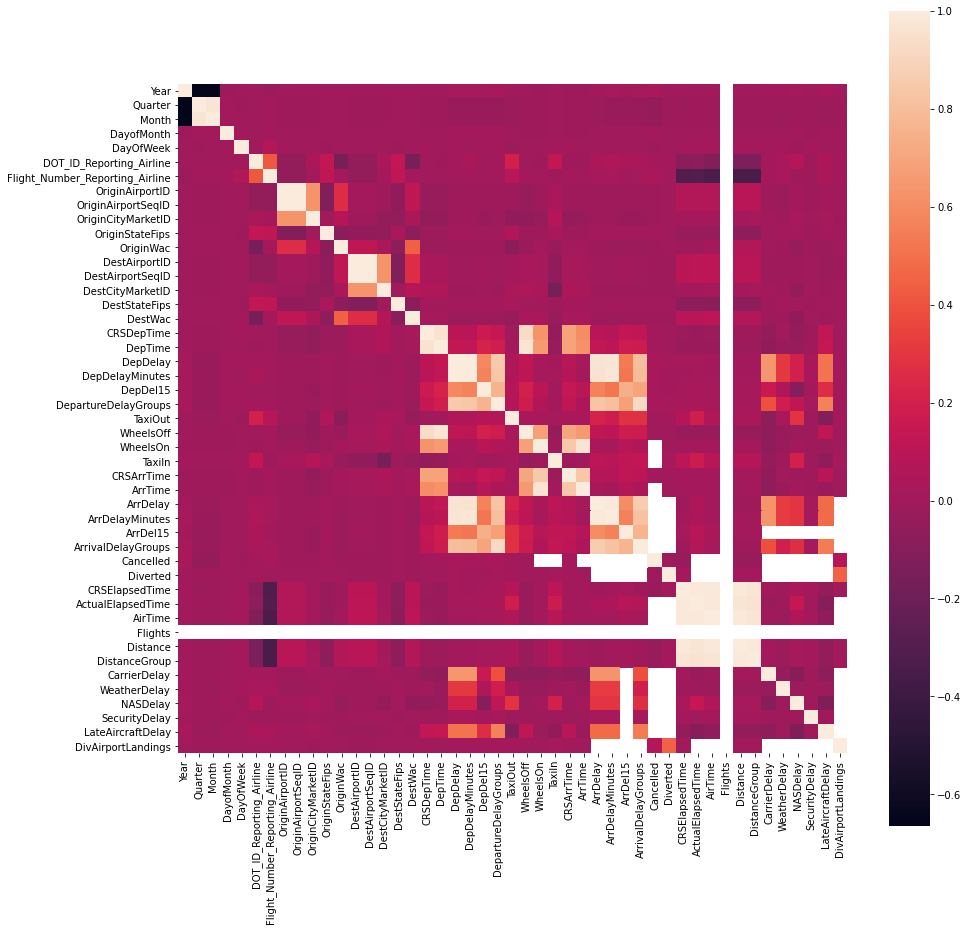

In [16]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, square=True);
plt.show()

Through the correlation matrix we can see how some of the 48 variables in the dataset present multicollinearity, in other words, can be linearly predicted from the others. In order to have a better analysis and work with a lighter dataset, we are going to extract valid variables and work with them and delete few unwanted variables if necessary.

In [17]:
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2
    df.loc[df['Diverted'] == 1, 'Status'] = 3
    df.loc[df['Cancelled'] == 1, 'Status'] = 4

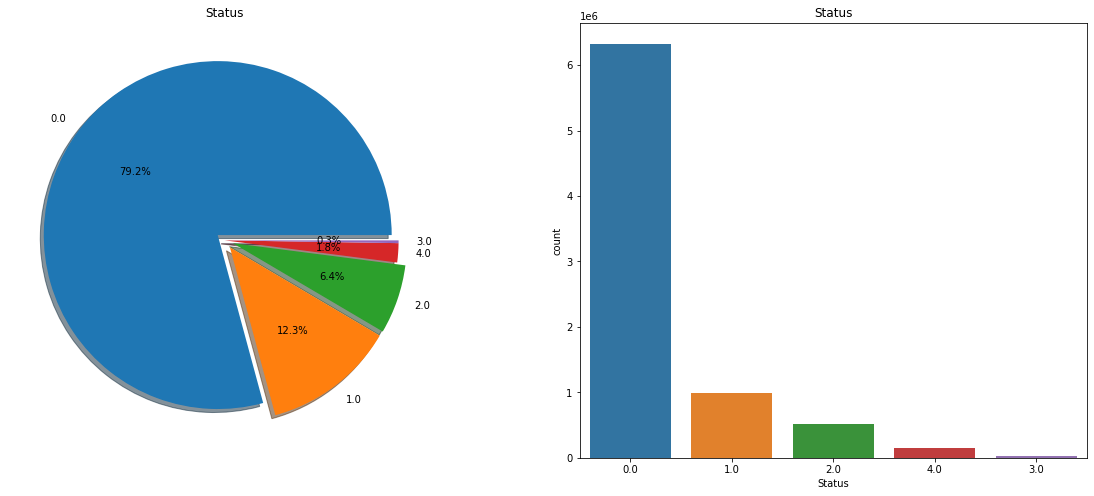

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [18]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = df['Status'].value_counts().index, data=df,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

# Cancellation Analysis

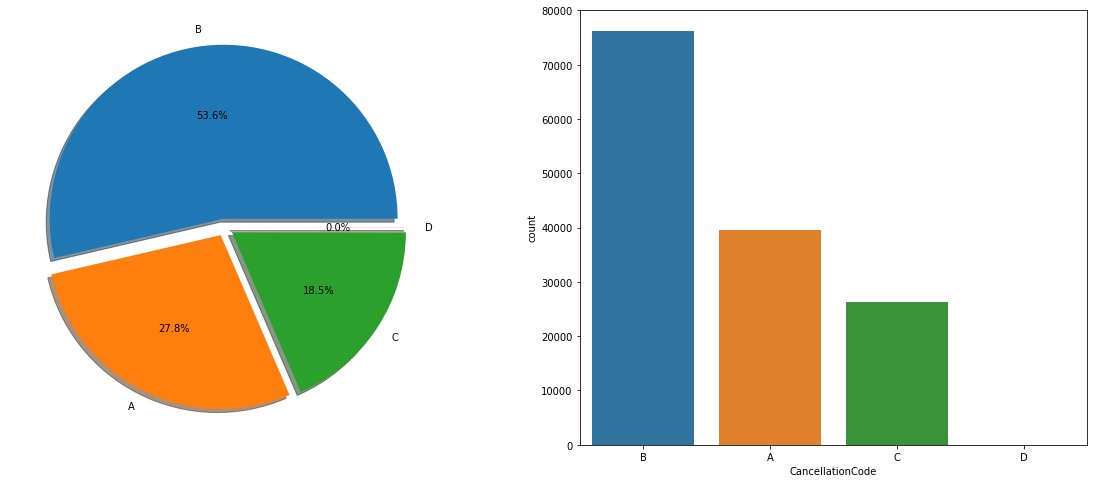

A = Air Carrier Delay, B = Weather Delay, C = National Aviation System (NAS) Delay, D= Security Delay


In [19]:
cancelled = df[df['Status']==4]

f,ax=plt.subplots(1,2,figsize=(20,8))
cancelled['CancellationCode'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot('CancellationCode', order = cancelled['CancellationCode'].value_counts().index, data=cancelled, ax=ax[1])
plt.show()


print('A = Air Carrier Delay, B = Weather Delay, C = National Aviation System (NAS) Delay, D= Security Delay')

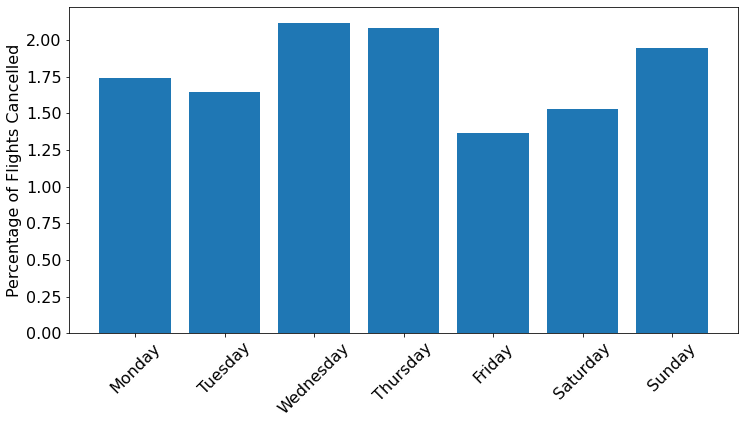

In [20]:
font = {'size'   : 16}
plt.rc('font', **font)

days_cancelled = cancelled['Cancelled'].groupby(df['DayOfWeek']).count()
days_total = df['Cancelled'].groupby(df['DayOfWeek']).count()
days_frac = np.divide(days_cancelled, days_total)
x=days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)

plt.show()

The above plot shows that friday has the least percentage of flights cancelled where in wednesday and thursday being the highest.

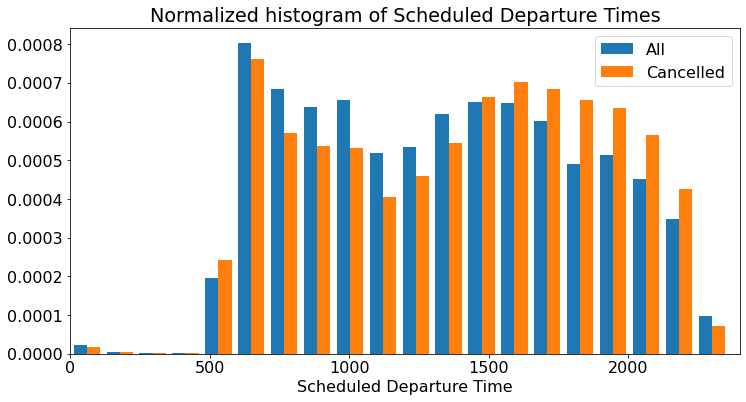

In [21]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['CRSDepTime'] , cancelled['CRSDepTime']] , density=True, bins=20 ,  label=['All', 'Cancelled'])

ax.set_xlim(0,2400)

ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')

plt.legend()
plt.show()

The above plot shows the early morning flights are more likely cancelled. 

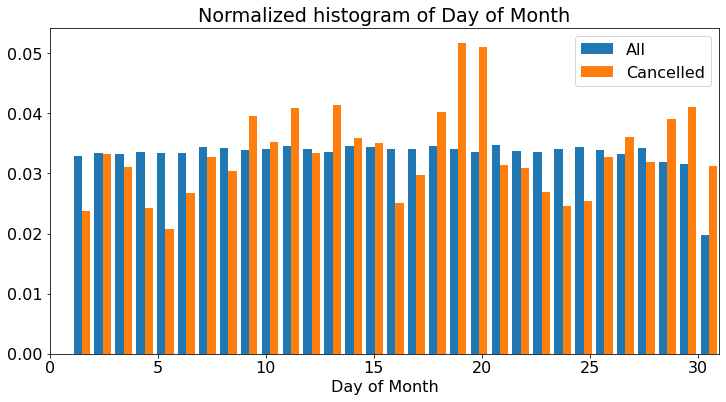

In [22]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['DayofMonth'], cancelled['DayofMonth']], density=True , bins=31 , label=['All', 'Cancelled'])

ax.set_xlim(0,31)

ax.set_xlabel('Day of Month')
ax.set_title('Normalized histogram of Day of Month')

plt.legend()
plt.show()

From the above plot it is clear that almost half of the month more flights are likely to be cancelled due to some reason.

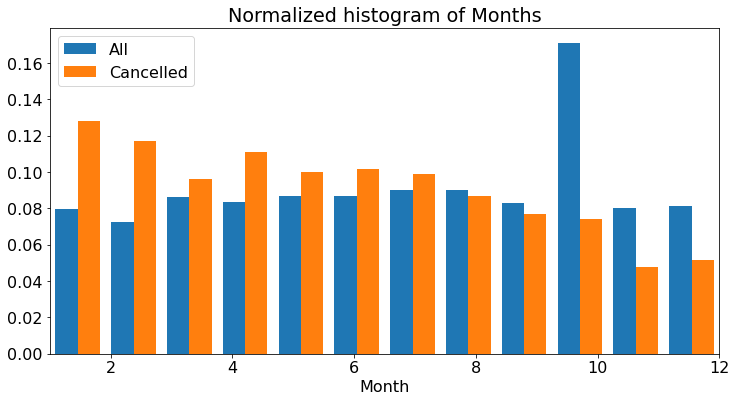

In [23]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['Month'], cancelled['Month']], density=1, bins=12, label=['All', 'Cancelled'])

ax.set_xlim(1,12)

ax.set_xlabel('Month')
ax.set_title('Normalized histogram of Months')

plt.legend()
plt.show()

From the above plot it looks like only the fourth quarter of the year is doing good with less cancellations.

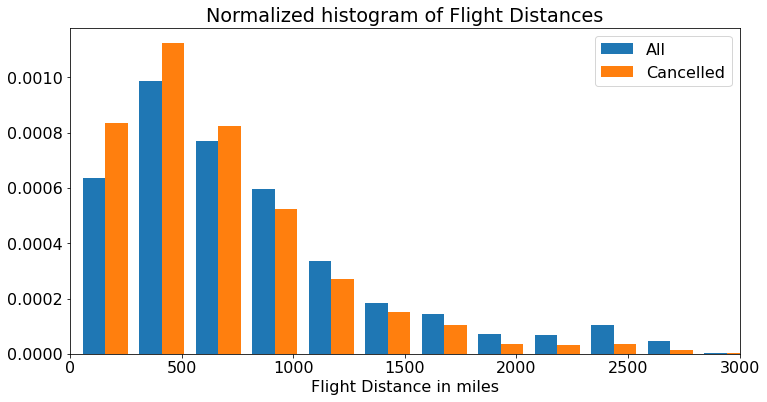

In [24]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['Distance'], cancelled['Distance']], density=True, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,3000)
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Normalized histogram of Flight Distances')

plt.legend()
plt.show()

From the above plot it looks like the flights that are flying for a shorter distance are more likely to be cancelled. 

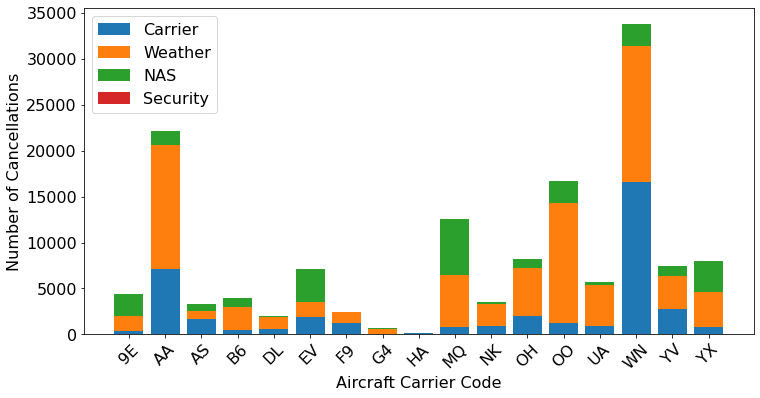

In [25]:
cancelled_group = cancelled.groupby(['Reporting_Airline','CancellationCode']).size().reindex(fill_value=0.0).unstack()
cg = cancelled_group.fillna(0)

b_bottom = cg.loc[:,'A'].values
c_bottom = b_bottom + cg.loc[:,'B'].values
d_bottom = c_bottom + cg.loc[:,'C'].values

x = cg.loc[:,'A'].index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),cg.loc[:,'A'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cg.loc[:,'B'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cg.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')
ax.bar(np.arange(len(x)),cancelled_group.loc[:,'D'].values, align='center', bottom=d_bottom, label='Security')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Number of Cancellations')

plt.legend()
plt.show()



In the above plot we grouped by carrier and cancellation code to see how many cancellations each carrier had and the distributions of the reasons for cancellation.

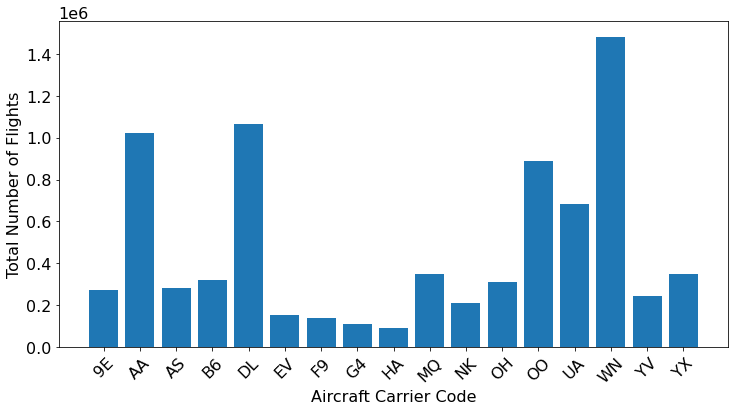

In [26]:
total_flights_per_carrier = df['Reporting_Airline'].groupby(df['Reporting_Airline']).count()

fig, ax1 = plt.subplots(figsize = (12,6))

x = total_flights_per_carrier.index.values

ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x, rotation = 45)
ax1.bar(np.arange(len(x)),total_flights_per_carrier.values, align='center')

ax1.set_xlabel('Aircraft Carrier Code')
ax1.set_ylabel('Total Number of Flights')

plt.show()

In the above plot we have plotted for the the total number of flights for each carrier.

We can see that Hawaiian Airlines had very few cancellation (but also relatively few flights) and also few of them were due to weather, whichs makes sense because Hawaii usually has good weather.

# Delay Analysis

In [27]:
Delayedflights = df[(df.Status >= 1) &(df.Status < 3)]

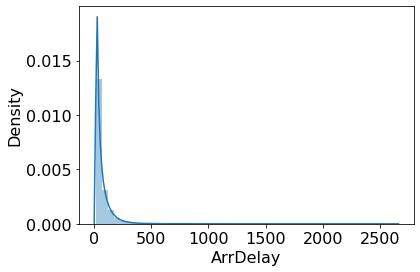

In [28]:
sns.distplot(Delayedflights['ArrDelay'])
plt.show()

In [29]:
print("Skewness: %f" % Delayedflights['ArrDelay'].skew())
print("Kurtosis: %f" % Delayedflights['ArrDelay'].kurt())

Skewness: 5.906373
Kurtosis: 56.608386


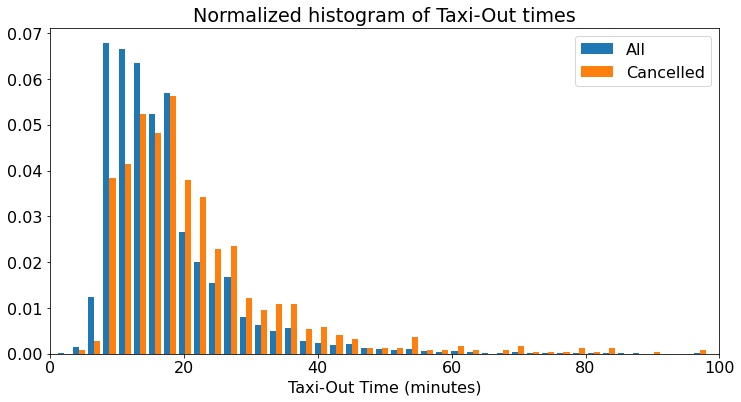

In [30]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['TaxiOut'], cancelled['TaxiOut']], density=1, bins=100, label=['All', 'Cancelled'])

ax.set_xlim(0,100)
ax.set_xlabel('Taxi-Out Time (minutes)')
ax.set_title('Normalized histogram of Taxi-Out times')

plt.legend()
plt.show()

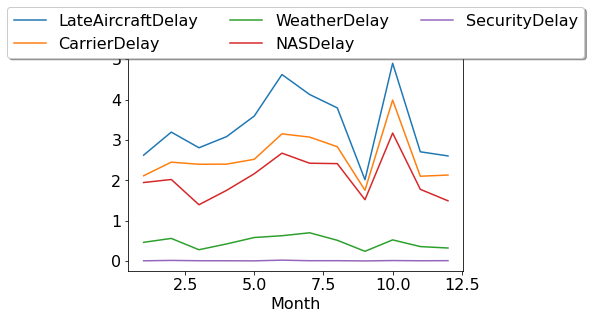

In [31]:
df2 = Delayedflights.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

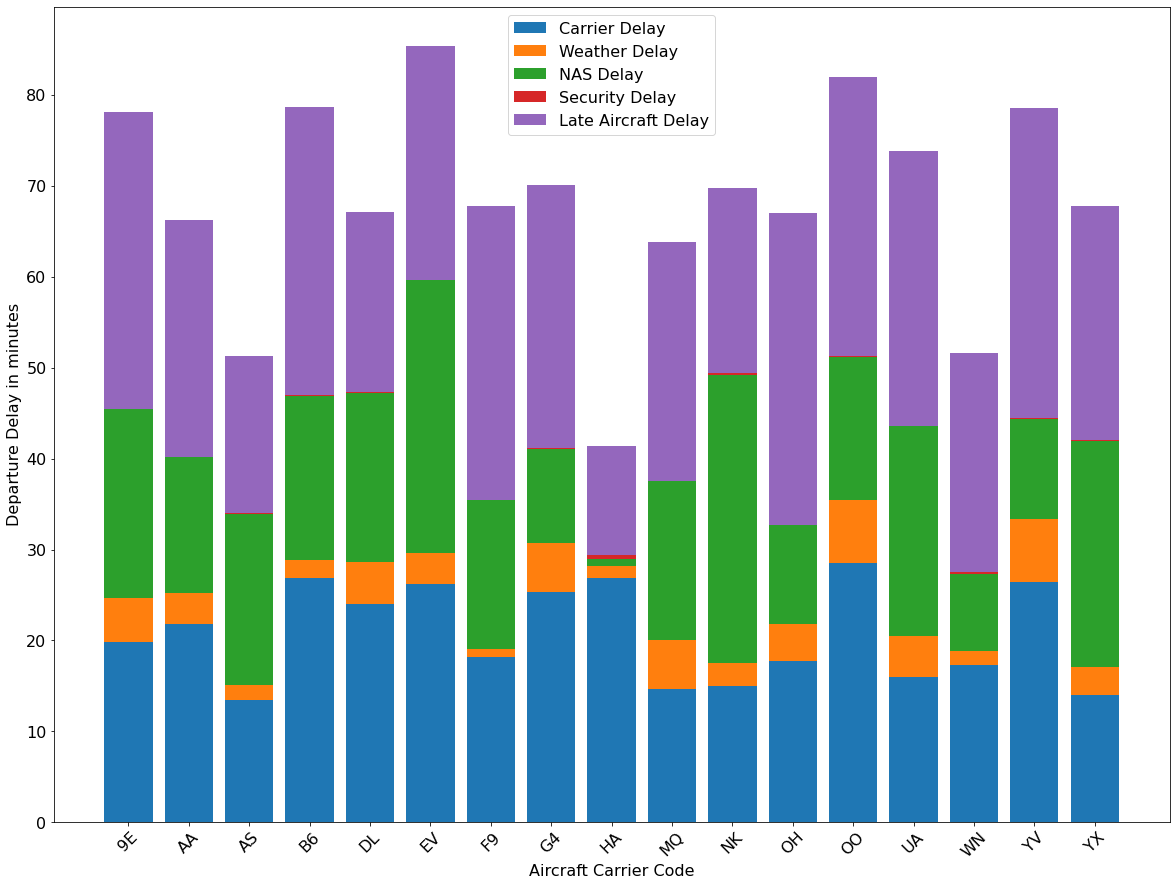

In [32]:
df['total_delay'] = (df['CarrierDelay'] + df['WeatherDelay']+ df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay'])

df_delayed = df[~np.isnan(df['total_delay'])]
df['total_delay'].fillna(0, inplace=True)
df_delayed.head()

carrier_group = df_delayed['CarrierDelay'].groupby(df_delayed['Reporting_Airline']).mean()
weather_group = df_delayed['WeatherDelay'].groupby(df_delayed['Reporting_Airline']).mean()
nas_group = df_delayed['NASDelay'].groupby(df_delayed['Reporting_Airline']).mean()
security_group = df_delayed['SecurityDelay'].groupby(df_delayed['Reporting_Airline']).mean()
late_group = df_delayed['LateAircraftDelay'].groupby(df_delayed['Reporting_Airline']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (20,15))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Departure Delay in minutes')

plt.legend()
plt.show()

In the above plot we grouped by carrier and their total delays to see how much delays each carrier had and the distributions of the reasons for delays.

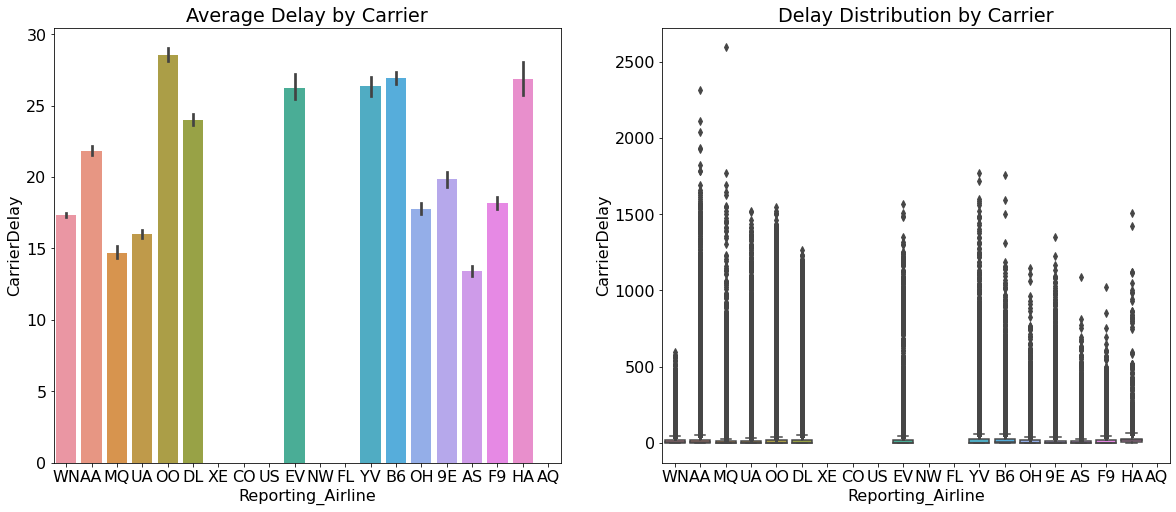

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines']
['US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines']
['AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [33]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Reporting_Airline','CarrierDelay', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('Reporting_Airline','CarrierDelay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines'])
print(['US: US Airways','EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines'])
print(['AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

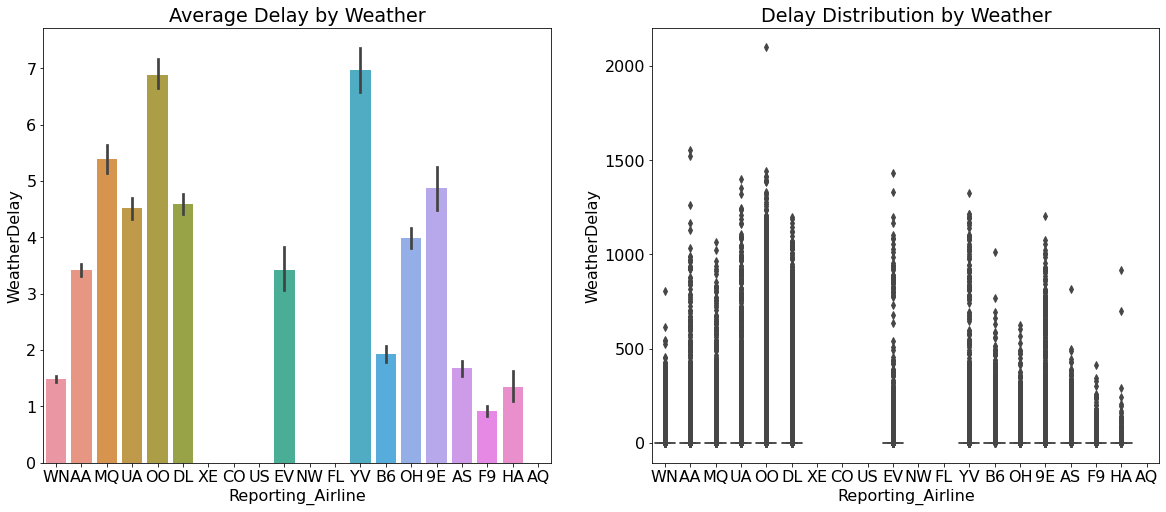

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines']
['US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines']
['AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [34]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Reporting_Airline','WeatherDelay', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by Weather')
sns.boxplot('Reporting_Airline','WeatherDelay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution by Weather')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines'])
print(['US: US Airways','EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines'])
print(['AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

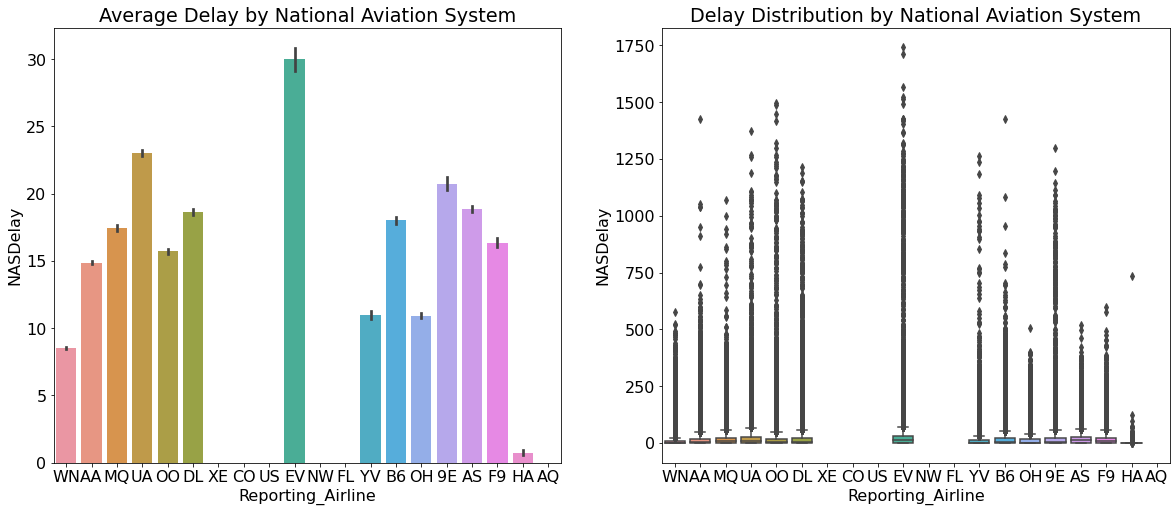

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines']
['US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines']
['AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [35]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Reporting_Airline','NASDelay', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by National Aviation System')
sns.boxplot('Reporting_Airline','NASDelay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution by National Aviation System')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines'])
print(['US: US Airways','EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines'])
print(['AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

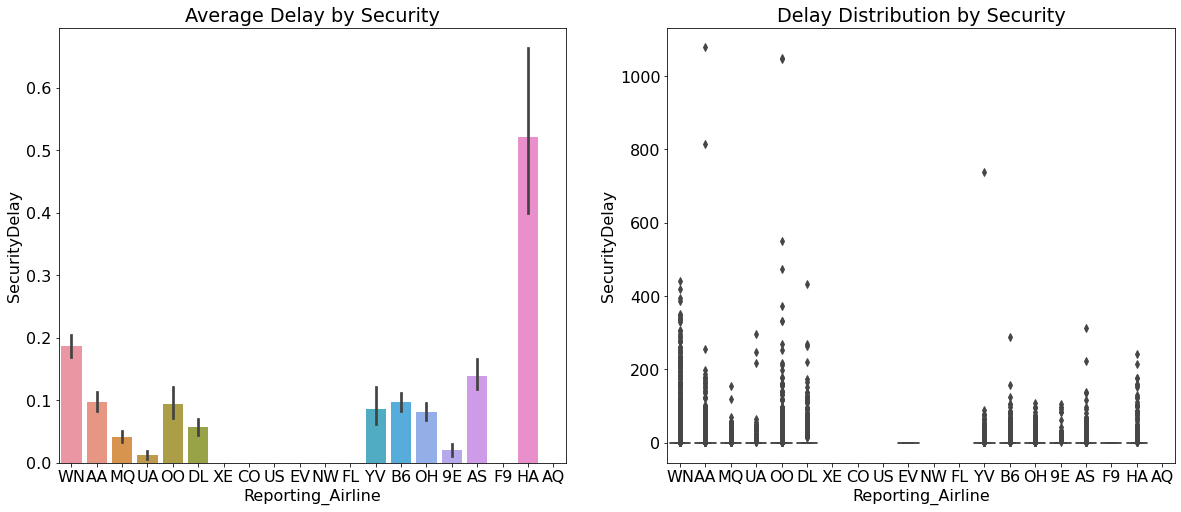

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines']
['US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines']
['AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [36]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Reporting_Airline','SecurityDelay', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by Security')
sns.boxplot('Reporting_Airline','SecurityDelay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution by Security')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines'])
print(['US: US Airways','EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines'])
print(['AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

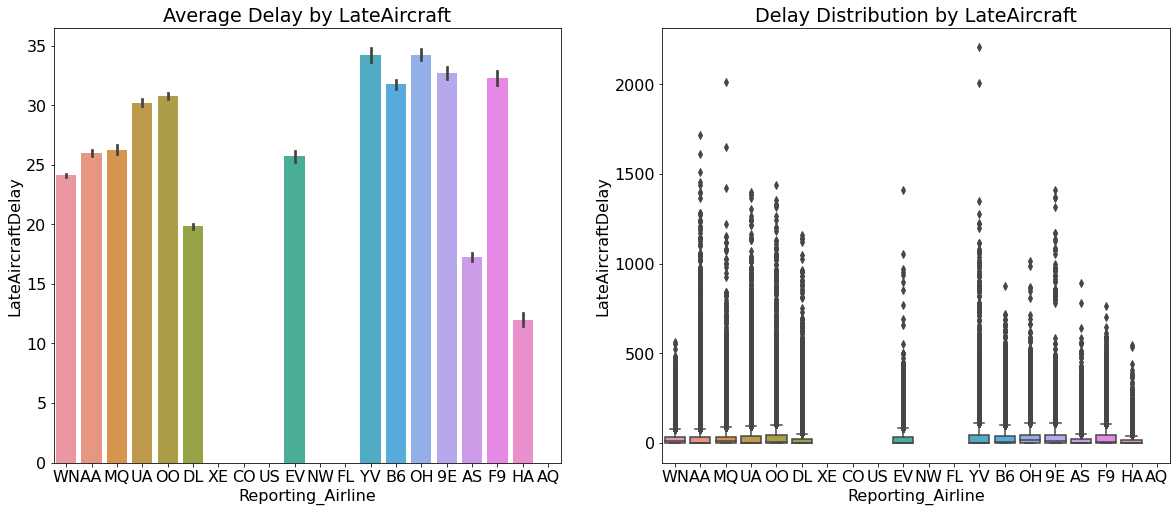

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines']
['US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines']
['AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [37]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Reporting_Airline','LateAircraftDelay', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by LateAircraft')
sns.boxplot('Reporting_Airline','LateAircraftDelay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution by LateAircraft')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines'])
print(['US: US Airways','EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines'])
print(['AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

In [38]:
Top20airports = Delayedflights[(Delayedflights.Origin == 'ORD') | (Delayedflights.Origin == 'ATL') |
                               (Delayedflights.Origin == 'DFW') | (Delayedflights.Origin == 'DEN') |
                               (Delayedflights.Origin == 'EWR') | (Delayedflights.Origin == 'LAX') | 
                               (Delayedflights.Origin == 'IAH') | (Delayedflights.Origin == 'PHX') |
                               (Delayedflights.Origin == 'DTW') | (Delayedflights.Origin == 'SFO') | 
                               (Delayedflights.Origin == 'LAS') | (Delayedflights.Origin == 'DEN') |
                               (Delayedflights.Origin == 'ORD') | (Delayedflights.Origin == 'JFK') | 
                               (Delayedflights.Origin == 'CLT') | (Delayedflights.Origin == 'LGA') |
                               (Delayedflights.Origin == 'MCO') | (Delayedflights.Origin == 'MSP') | 
                               (Delayedflights.Origin == 'BOS') | (Delayedflights.Origin == 'PHL')]

print(Top20airports['Origin'].value_counts())

ORD    93067
DFW    75154
ATL    68956
DEN    58321
CLT    51005
LGA    45662
IAH    41585
SFO    40321
LAX    39931
EWR    39329
BOS    35150
PHX    32802
MCO    31835
LAS    31460
DTW    28309
JFK    27416
MSP    26588
PHL    25559
Name: Origin, dtype: int64


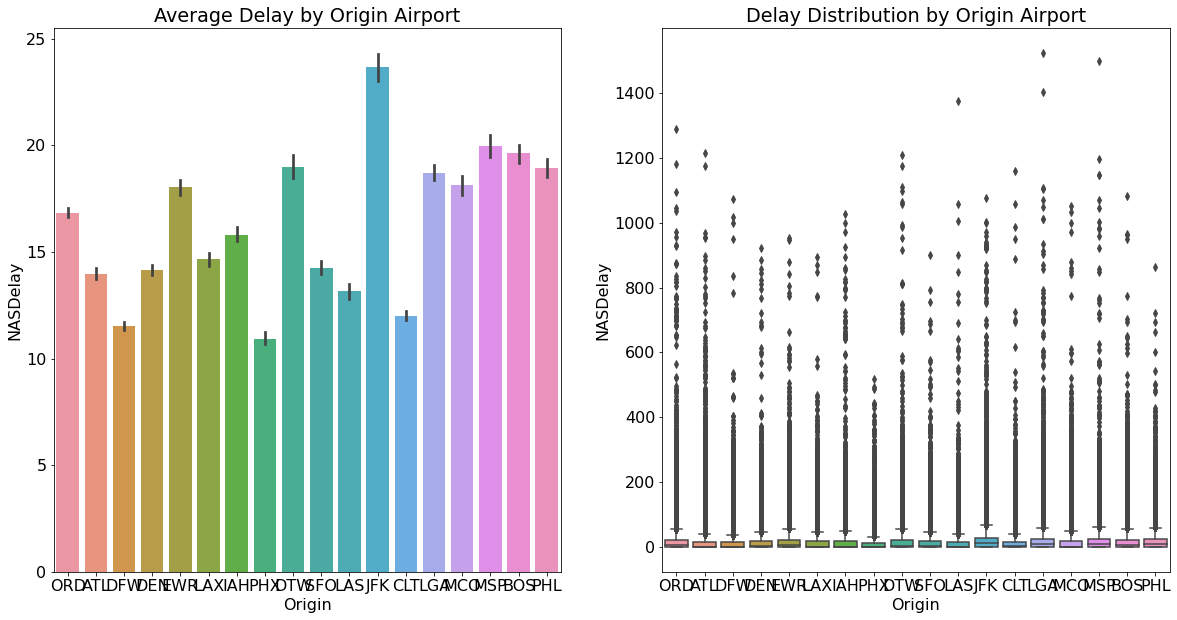

['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver', 'EWR: Newark', 'LAX: Los Ángeles', 'IAH: Houston', 'PHX: Phoenix', 'DTW: Detroit', 'SFO: San Francisco', 'LAS: Las Vegas', 'JFK: New York', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'MCO: Orlando', 'MSP: Minneapolis', 'BOS Boston', 'PHL Philadelphia']


In [39]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot('Origin','NASDelay', data=Top20airports,ax=ax[0], order=['ORD', 'ATL', 'DFW', 'DEN','EWR','LAX','IAH','PHX','DTW',
                                                                     'SFO', 'LAS','JFK','CLT', 'LGA','MCO','MSP','BOS','PHL'])
ax[0].set_title('Average Delay by Origin Airport')
sns.boxplot('Origin','NASDelay', data=Top20airports,ax=ax[1], order=['ORD', 'ATL', 'DFW', 'DEN','EWR','LAX','IAH','PHX','DTW',
                                                                     'SFO', 'LAS','JFK','CLT', 'LGA','MCO','MSP','BOS','PHL'])
ax[1].set_title('Delay Distribution by Origin Airport')
plt.close(2)
plt.show()

print(['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver','EWR: Newark','LAX: Los Ángeles',
       'IAH: Houston','PHX: Phoenix','DTW: Detroit','SFO: San Francisco','LAS: Las Vegas','JFK: New York','CLT: Charlotte',
       'LGA: La Guardia (NY)','MCO: Orlando','MSP: Minneapolis','BOS Boston','PHL Philadelphia'])

In [40]:
Data=df[['Year','Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime','Flight_Number_Reporting_Airline','Tail_Number','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay','Origin','Dest','Distance','TaxiIn','TaxiOut','Cancelled','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
Data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,Flight_Number_Reporting_Airline,Tail_Number,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2018,10,14,7,1127.0,1123,1854.0,1910,1674,N925UY,267.0,287.0,232.0,-16.0,4.0,LAX,CLT,2125.0,9.0,26.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2018,10,15,1,1119.0,1123,1849.0,1910,1674,N583UW,270.0,287.0,235.0,-21.0,-4.0,LAX,CLT,2125.0,12.0,23.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2018,10,16,2,1119.0,1123,1856.0,1910,1674,N581UW,277.0,287.0,248.0,-14.0,-4.0,LAX,CLT,2125.0,9.0,20.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2018,10,17,3,1120.0,1123,1902.0,1910,1674,N551UW,282.0,287.0,256.0,-8.0,-3.0,LAX,CLT,2125.0,6.0,20.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2018,10,18,4,1125.0,1123,1906.0,1910,1674,N181UW,281.0,287.0,249.0,-4.0,2.0,LAX,CLT,2125.0,11.0,21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989937,2019,10,31,4,916.0,850,1022.0,950,2301,N774XF,66.0,60.0,36.0,32.0,26.0,DFW,OKC,175.0,3.0,27.0,0.0,0.0,2.0,0.0,6.0,0.0,24.0
7989938,2019,10,1,2,1019.0,1028,1118.0,1140,2301,N767UW,59.0,72.0,33.0,-22.0,-9.0,OKC,DFW,175.0,14.0,12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
7989939,2019,10,2,3,1025.0,1028,1127.0,1140,2301,N754UW,62.0,72.0,37.0,-13.0,-3.0,OKC,DFW,175.0,15.0,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
7989940,2019,10,3,4,1019.0,1031,1126.0,1148,2301,N837AW,67.0,77.0,39.0,-22.0,-12.0,OKC,DFW,175.0,11.0,17.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [41]:
print(all(i < 0 for i in Data['ArrTime']))
print(all(i < 0 for i in Data['CRSArrTime']))
print(all(i < 0 for i in Data['DepTime']))
print(all(i < 0 for i in Data['CRSDepTime']))

False
False
False
False


In [42]:
Data.dtypes

Year                                 int64
Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
DepTime                            float64
CRSDepTime                           int64
ArrTime                            float64
CRSArrTime                           int64
Flight_Number_Reporting_Airline      int64
Tail_Number                         object
ActualElapsedTime                  float64
CRSElapsedTime                     float64
AirTime                            float64
ArrDelay                           float64
DepDelay                           float64
Origin                              object
Dest                                object
Distance                           float64
TaxiIn                             float64
TaxiOut                            float64
Cancelled                          float64
Diverted                           float64
CarrierDelay                       float64
WeatherDela

In [43]:
Data.isna().sum()

Year                                     0
Month                                    0
DayofMonth                               0
DayOfWeek                                0
DepTime                             137117
CRSDepTime                               0
ArrTime                             145146
CRSArrTime                               0
Flight_Number_Reporting_Airline          0
Tail_Number                          19311
ActualElapsedTime                   162611
CRSElapsedTime                         135
AirTime                             162611
ArrDelay                            162611
DepDelay                            137141
Origin                                   0
Dest                                     0
Distance                                 0
TaxiIn                              145148
TaxiOut                             141195
Cancelled                                0
Diverted                                 0
CarrierDelay                       6491169
WeatherDela

In [44]:
Data['ActualElapsedTime']=Data['ActualElapsedTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['CRSElapsedTime']=Data['CRSElapsedTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['AirTime']=Data['AirTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['ArrTime']=Data['ArrTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['DepTime']=Data['DepTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['ArrDelay']=Data['ArrDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['DepDelay']=Data['DepDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['CarrierDelay']=Data['CarrierDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['WeatherDelay']=Data['WeatherDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['NASDelay']=Data['NASDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['LateAircraftDelay']=Data['LateAircraftDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['SecurityDelay']=Data['SecurityDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['TaxiIn']=Data['TaxiIn'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['TaxiOut']=Data['TaxiOut'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['Tail_Number']=Data['Tail_Number'].interpolate(method='linear',limit_direction ='both',axis=0)

In [45]:
Data.isna().sum()

Year                                   0
Month                                  0
DayofMonth                             0
DayOfWeek                              0
DepTime                                0
CRSDepTime                             0
ArrTime                                0
CRSArrTime                             0
Flight_Number_Reporting_Airline        0
Tail_Number                        19311
ActualElapsedTime                      0
CRSElapsedTime                         0
AirTime                                0
ArrDelay                               0
DepDelay                               0
Origin                                 0
Dest                                   0
Distance                               0
TaxiIn                                 0
TaxiOut                                0
Cancelled                              0
Diverted                               0
CarrierDelay                           0
WeatherDelay                           0
NASDelay        

In [46]:
for y in Data.columns:
    if(Data[y].dtype == np.float64):
        Data[y] = Data[y].astype(int)

Data.dtypes

Year                                int64
Month                               int64
DayofMonth                          int64
DayOfWeek                           int64
DepTime                             int64
CRSDepTime                          int64
ArrTime                             int64
CRSArrTime                          int64
Flight_Number_Reporting_Airline     int64
Tail_Number                        object
ActualElapsedTime                   int64
CRSElapsedTime                      int64
AirTime                             int64
ArrDelay                            int64
DepDelay                            int64
Origin                             object
Dest                               object
Distance                            int64
TaxiIn                              int64
TaxiOut                             int64
Cancelled                           int64
Diverted                            int64
CarrierDelay                        int64
WeatherDelay                      

In [47]:
Data['total_delay'] = (Data['CarrierDelay'] + Data['WeatherDelay']+ Data['NASDelay'] + Data['SecurityDelay'] + Data['LateAircraftDelay'])
Data['Carrier mean distance'] = Data['Distance'].groupby(Data['Flight_Number_Reporting_Airline']).transform('mean')
Data['Origin TaxiOut'] = Data['TaxiOut'].groupby(Data['Origin']).transform('mean')
Data['Origin Delay'] = Data['total_delay'].groupby(Data['Origin']).transform('mean')
Data['Origin'] = Data['Origin'].astype('category').cat.codes
Data['Dest'] = Data['Dest'].astype('category').cat.codes
#Too large data set consuming a lot of time so lets slice the data
new_Data = Data.sample(n=500000, random_state = 7)

X = new_Data[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Origin', 'Dest', 'Distance', 'Carrier mean distance',
        'Origin Delay', 'Origin TaxiOut']]
y = new_Data['Cancelled']


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

clf = RandomForestClassifier(criterion = 'entropy', random_state=7).fit(X_train, y_train)

y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)
print('Feature importances: {}'.format(clf.feature_importances_))

Recall: 0.011
Precision: 0.490
Accuracy: 0.983
F1: 0.022
[[122828     25]
 [  2123     24]]
Feature importances: [0.08490996 0.13655107 0.07713586 0.14818606 0.06116329 0.0993309
 0.11508486 0.14948457 0.06371322 0.0644402 ]


In [50]:
from sklearn.metrics import roc_curve, auc, classification_report
report = classification_report(y_test, y_predicted)
print("Classification report for Decision Tree Classifier")
print(report)

Classification report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    122853
           1       0.49      0.01      0.02      2147

    accuracy                           0.98    125000
   macro avg       0.74      0.51      0.51    125000
weighted avg       0.97      0.98      0.97    125000



In [51]:
fpr, tpr, _ = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)
print('AUC: {:.3f}'.format(roc_auc))

AUC: 0.505


In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
dist = {"n_estimators": randint(1, 50),"criterion" :["entropy"],"random_state": [7]}
rf_cv = RandomizedSearchCV(clf, dist, cv = 5) 
  
rf_cv.fit(X, y) 
print("Tuned Random forest Parameters:",rf_cv.best_params_)
print("Best score is ",rf_cv.best_score_)

Tuned Random forest Parameters: {'criterion': 'entropy', 'n_estimators': 44, 'random_state': 7}
Best score is  0.98255


Random forest with optimal number of trees

In [56]:
rfcl = RandomForestClassifier(criterion = 'entropy',n_estimators =44,random_state=7)
r_rfcl = rfcl.fit(X_train, y_train)
print(r_rfcl)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=44,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)


In [59]:
confusion = confusion_matrix(y_test, y_predict_r_rfcl)
print(confusion)

[[122821     32]
 [  2124     23]]


In [58]:
report_r_rfcl = classification_report( y_test, y_predict_r_rfcl)
print("Classification report for Decision Tree Classifier")
print(report_r_rfcl)

Classification report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    122853
           1       0.42      0.01      0.02      2147

    accuracy                           0.98    125000
   macro avg       0.70      0.51      0.51    125000
weighted avg       0.97      0.98      0.97    125000



In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_r_rfcl)
r_rfcl_model_auc = auc(fpr, tpr)
print(r_rfcl_model_auc)

0.5052260741819611


The RF algorithms were not able to predict the cancelled flights accurately

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=300, learning_rate = 0.003, 
                                 max_depth = 2, random_state=37).fit(X_train, y_train)

y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)
print('Feature importances: {}'.format(clf.feature_importances_))

Recall: 0.000
Precision: 0.000
Accuracy: 0.983
F1: 0.000
[[122853      0]
 [  2147      0]]
Feature importances: [0.48686211 0.19747962 0.         0.01727231 0.         0.
 0.02262129 0.20385702 0.         0.07190765]


The decision tree algorithms were not able to predict any cancelled flights

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

lr = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall').fit(X_train_scaled, y_train)
print(grid_lr.cv_results_['mean_test_score'].reshape(9,2))

[[nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]]


The Logistic Reg failed to predict the cancelled flights as well

In [ ]:
#TAKING HOURS TO EXECUTE
#from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

#svm = SVC(kernel='rbf', C=1000, gamma=6, random_state=47).fit(X_train_scaled, y_train)
#y_pred = svm.predict(X_test_scaled)

#print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
#print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
#print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
#print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
#confusion = confusion_matrix(y_test, y_pred)
#print(confusion)

In [ ]:
Data_pca= Data[['Cancelled','ActualElapsedTime','TaxiOut', 'DepDelay']]
print (Data_pca.dtypes)